# 1. Import std. libraries

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#import pywget #<== NOT WORKING CORRECTLY UNABLE TO UNZIP THE DOWNLOADED FILE
import tarfile
import os
from six.moves import urllib
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer

# 2. Download the data

In [3]:
# DOWNLOAD THE DATA
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

# 3. Read the data to a Data Frame

In [35]:
# READ THE DATA INTO A DATAFRAME
df = pd.read_csv("datasets/housing/housing.csv")

# 4. Display all the column details
Check how many non nulls are present in each variable and also the data type of the columns

In [5]:
# Display the column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# 5. To convert the data type of a column

### use `df.astype(dtype = {'a':int, 'b': float, 'c':str}, inplace=True)`

### use `df = pd.read_csv(dtype={'a':int,...})`

In [13]:
# All the data is in correct format.
# If the data/columns are not in correct data types,
# you may use the following to convert the data types 
# For example to make the "longitude" as float
df = df.astype(dtype={"longitude":float})
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20433 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20433 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


# 6. To display all the numeric columns summary only...
### use `df.describe()`

In [7]:
# Get the summary of numeric columns only

# To get numeric columns details
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# 7. Display initial rows in the data frame
### use `df.head()` or `df.head(5)`

In [31]:
# Display top 5 rows:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# 8. To display the final rows
### use `df.tail()` or `df.tail(5)`

In [9]:
df.tail(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


# 9. To count the various levels of a categorical variables
### Use `value_counts()`

In [10]:
# To get the counts of varions levels in a categorical var
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

# 10. To get the number of nulls in each column
### use `df.isnull().sum()`

In [33]:
# To find the nulls in each column of the dataset
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [34]:
# To get percentage of nulls:
df.isnull().sum()/len(df) *100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

# 11. To find the nummer of rows in a data frame
### use `len(df)` or `len(df.index)`

In [35]:
# to find the number of rows:
len(df)
len(df.index)

20640

# 12. To get all the column names of a dataframe
### use `df.columns`


In [36]:
# to find the column names:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

# 13. To change the all the column names in one go
### use `df.columns = [<new_col_1>,<new_col_2>,...]`

In [37]:
#df.columns = [str(j)+"_"+str(i) for (i, j) in enumerate(df.columns)]
#df.head()

In [38]:
# reset the column names back to the actual column names
# df.columns = [i.split('_')[0] for i in df.columns]
# df.head()

# 14. To change specific column names only
### use `df.rename(columns={<old_col_1>:<new_col_1>,...})`

In [39]:
# To raname  specific columns:
df.rename(columns={"latitude":"LONGITUDE_1"},inplace=True)
print(df.columns)

# revert back
df.rename(columns={"LONGITUDE_1":"latitude"},inplace=True)
print(df.columns)

Index(['longitude', 'LONGITUDE_1', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


# 15. To find the row names
### use `df.index`

In [40]:
df.index

RangeIndex(start=0, stop=20640, step=1)

# 16. Get the percentage of nulls in all columns

<AxesSubplot:title={'center':'% of nulls'}, xlabel='variables', ylabel='percentage'>

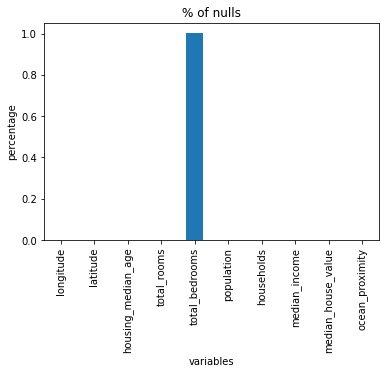

In [41]:
# YOU CAN ALSO PLOT THE % OF NULLS
(df.isnull().sum()/len(df) *100).plot(kind="bar", 
                                      title="% of nulls", 
                                      xlabel="variables",
                                      ylabel="percentage")

# 17. To plot histogram of all numeric columns

### use `df.hist(bins=50, figsize=(20,15))`

### It will automatically ignore non-numeric columns in the data frame

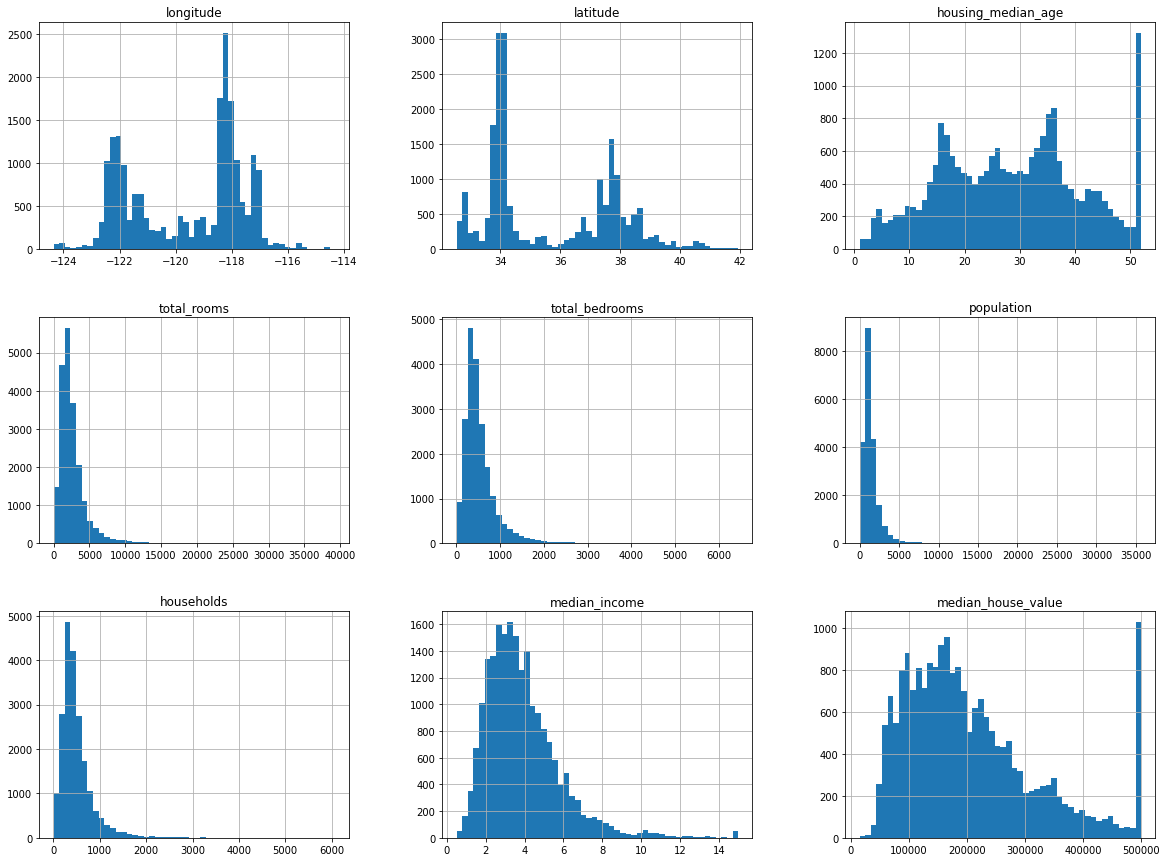

In [11]:
# To plot histograms on all the numeric attributes:

%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

# 18. To plot the histogram of a specific numeric column
### use `df['col'].hist(bins=50,figsize=(10,5))`

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


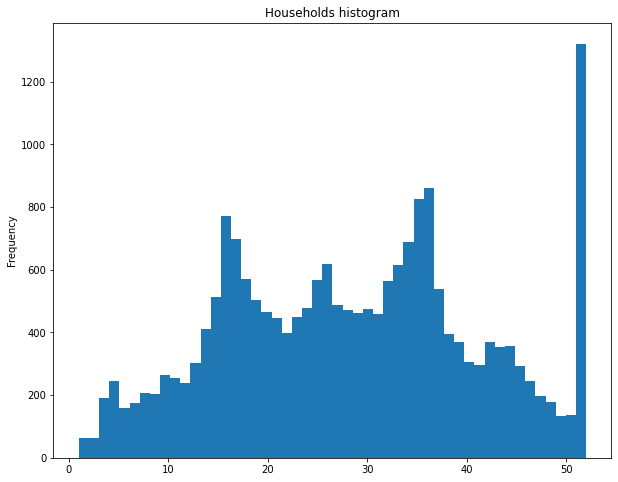

In [39]:
print(df.columns)
df['housing_median_age'].plot(kind="hist",
                      bins=50,
                      figsize=(10,8), 
                      title="Households histogram",
                     xlabel = 'median housing value',
                     ylabel='frequency')
plt.show()

In [40]:
# The target variable is capped at some value (500k dollars).
# We may need to discard these records, if we do NOT want the cap 
# to be applied by the model, and penalize the predictions beyond $500k

# 19. Test train split


In [41]:
# STOP NOW and CREATE A TEST SET

# Here is a simple method to randomly split the data into test and train

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

# 20. Stratified sampling

In [42]:
# Assuming that the income variable is a very important variable,
# let us create 4 income bins, and use those bins to split the 
# data into stratified smapelling method

df['income_cat'] = pd.cut(df['median_income'],
                         bins=[0.0,1.5,3.0,4.5,6.0,np.inf],
                         labels=[1,2,3,4,5])


<AxesSubplot:>

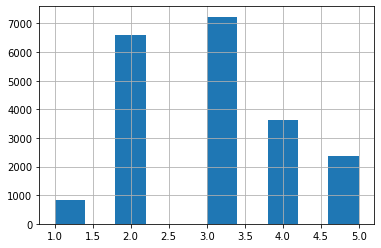

In [43]:
df['income_cat'].hist()

In [44]:
# Getting stratified sampling.
# The idea is to get 20% data for each label in income_cat

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df['income_cat']):
    stratified_train_df = df.loc[train_index]
    stratified_test_df = df.loc[test_index]

<AxesSubplot:>

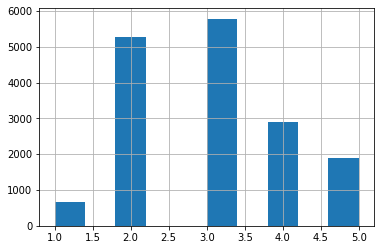

In [45]:
stratified_train_df['income_cat'].hist()

<AxesSubplot:>

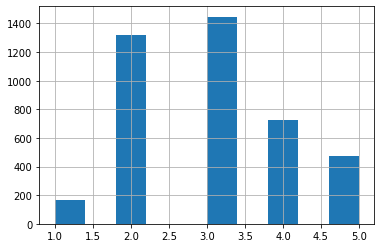

In [46]:
stratified_test_df['income_cat'].hist()

# 21. Drop a column in-place
### use `df.drop(col_name, axis=1, inplace=True)`

In [47]:
# drop the income_cat from both the test and train datasets
for i in (stratified_test_df, stratified_train_df):
    i.drop('income_cat', axis=1, inplace=True)

## 21.1 To drop multiple columns supply the list of columns
## use `df.drop([cola, colb...],axis=1, inplace=True)`

# 22. Plotting the latitude and longitude

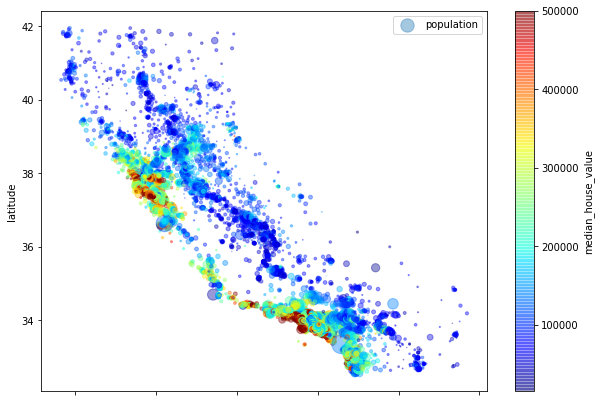

In [48]:
df.plot(kind='scatter',
       x = 'longitude',
       y = 'latitude',
       alpha=0.4,
       s = df['population']/100,
       label='population',
       figsize=(10,7),
       c = "median_house_value",
       cmap=plt.get_cmap('jet'),
       colorbar=True)
plt.legend()

# 23. Sorting the values of a data frame
### use `df.sort_values(<column_name>, ascending=False/True)`
### use `df.sort_values([<col_1>, <col_2>...], ascending=[1, 0, 1...])`

In [49]:
# Example
# sort the values of data frame in ascending values of median_income
df.sort_values('median_income', ascending=False).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
4352,-118.37,34.10,37.0,407.0,67.0,100.0,47.0,15.0001,500001.0,<1H OCEAN,5
10673,-117.85,33.62,13.0,5192.0,658.0,1865.0,662.0,15.0001,500001.0,<1H OCEAN,5
8849,-118.40,34.08,52.0,3815.0,439.0,1266.0,413.0,15.0001,500001.0,<1H OCEAN,5
4606,-118.33,34.07,52.0,1482.0,171.0,531.0,161.0,15.0001,500001.0,<1H OCEAN,5
5257,-118.49,34.06,42.0,2861.0,360.0,829.0,310.0,15.0001,500001.0,<1H OCEAN,5


In [50]:
# Example
# Sort the values of Data Frame in ascending total_rooms and descending total_bedrooms
df.sort_values(['total_rooms', 'total_bedrooms'], ascending=[True, False]).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
3126,-117.79,35.21,4.0,2.0,2.0,6.0,2.0,2.3750,137500.0,INLAND,2
12286,-116.95,33.86,1.0,6.0,2.0,8.0,2.0,1.6250,55000.0,INLAND,2
16171,-122.50,37.79,52.0,8.0,1.0,13.0,1.0,15.0001,500001.0,NEAR BAY,5
5916,-118.44,34.28,46.0,11.0,11.0,24.0,13.0,2.8750,162500.0,<1H OCEAN,2
73,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,67500.0,NEAR BAY,1


# 24. Coefficient of correlations

### use `df.corr()` to get the coefficient of correlations between all numeric variables

### It automatically avoids the non-numeric variables in the data frame while computing Coeff of correlation

In [51]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


# 25. To get the coefficient of correlation of one numeric variable with all others

### use `df.corr()['var'].sort_values(ascending=False)`

In [52]:
corr_matrix = df.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<AxesSubplot:>

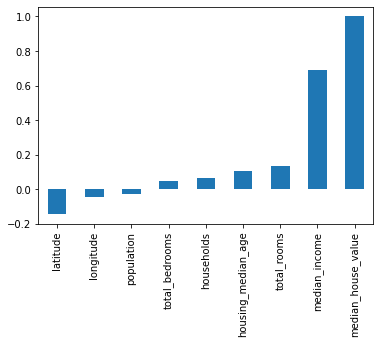

In [53]:
corr_matrix['median_house_value'].sort_values().plot(kind="bar")

# 26. Drawback of Coeff. of correlation 
## * It only captures linear relationship between numeric variables.
### * You do NOT have to filter the non-numeric columns from the data frame
## * Plot the correlation plots between all the numeric variables

## * use `scatter_matrix()` after importing that from `pandas.plotting`

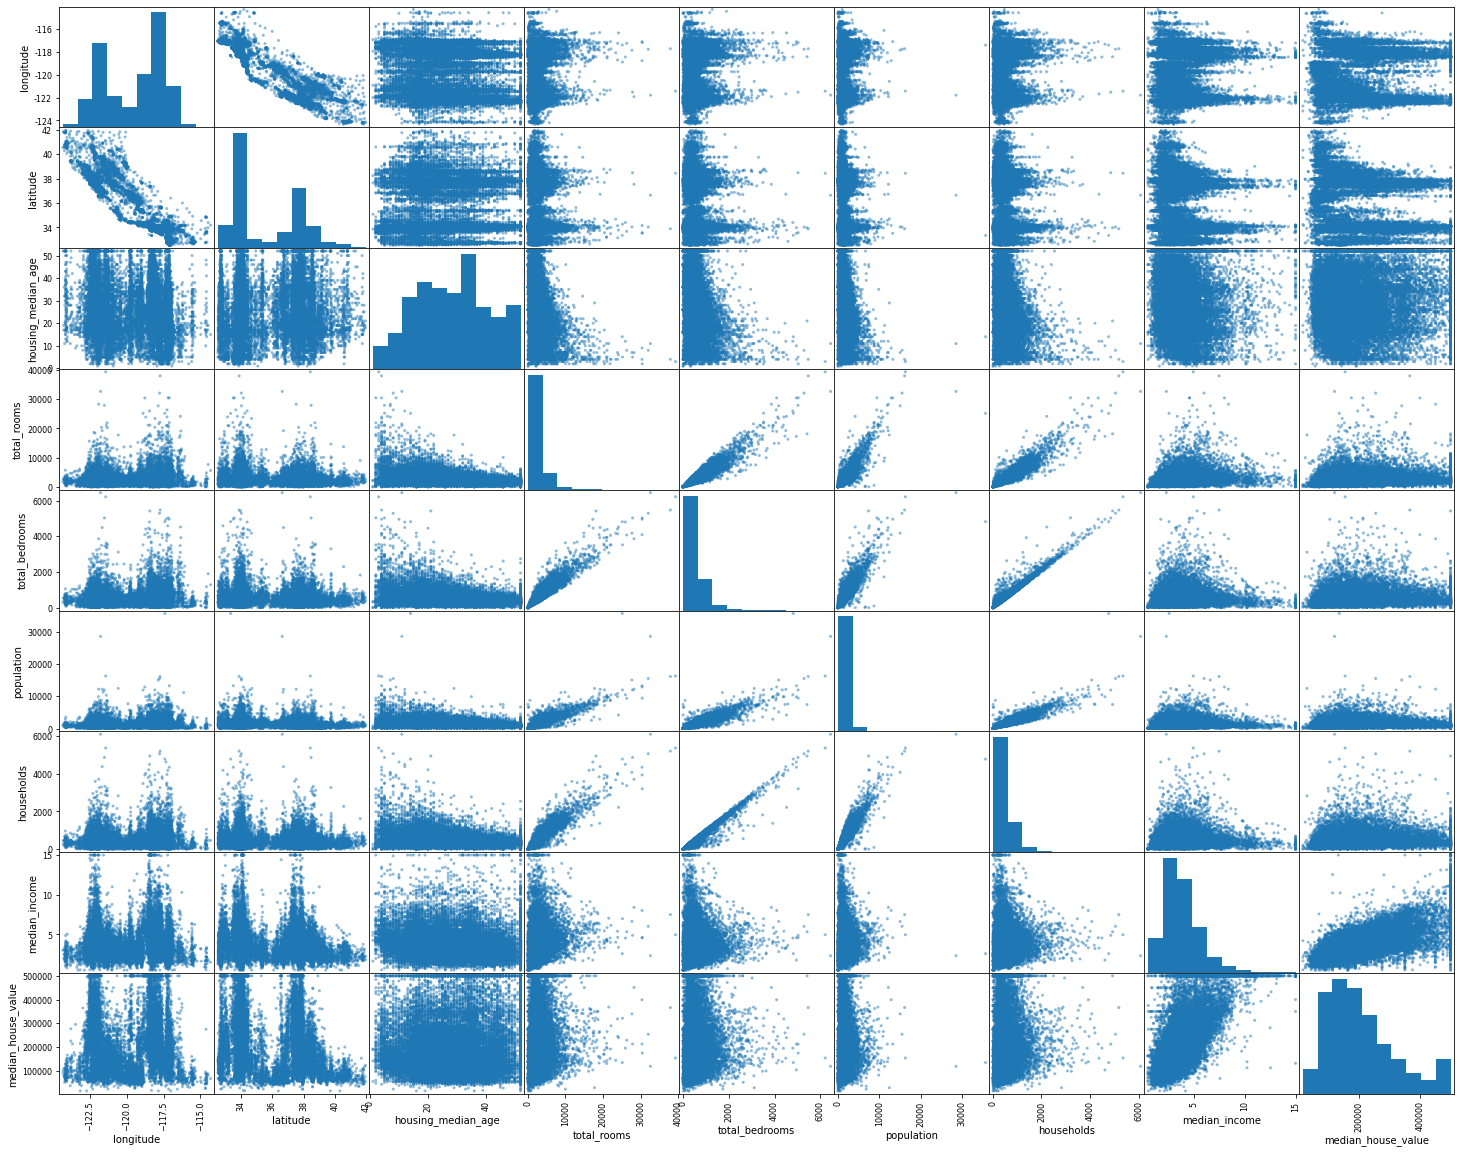

In [54]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(25,20))
plt.show()

## 26.1 Make these observations out of `scatter_matrix()` plot

### * Is there any visible relationship between any of the  source and target variables?
_In the above plot, the target variable `median_house_value` has a some kind of relationship with `median_income`_

### * Is there any visible relationships betweeen other independent variables?
_In the above plot there is a linear relationship between `households` and {`total_rooms`, `total_bedrooms`, `population`}. It's a good idea to combine them into one variable (or take some ratios etc)_

### * `total_rooms` and `total_bedrooms` are also having linear relationship. We will combine them to form one metric


# 27. Adding additional attribiutes to the data frame

### Let us add the following 3 attributes:
`rooms_per_household` = `total_rooms`/`households`

`bedrooms_per_room` = `total_bedrooms`/`total_rooms`

`population_per_household` = `population`/`households`

In [55]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

# 28. Dealing with missing values

## There are 3 methods:

#### 1. Delete the rows wherever we have null values. 
_But how can you handle the input data that has nulls?_

#### 2. Drop the column. 
_Not an optimal approach if you have a very small percentage of nulls in the column._

#### 3. Impute the missing values with mean or median or mode or zero or a random value from the column. 
_This looks promising. But how do we know which method to choose? Try all the methods and get the error rate, and then choose the optimal method._


# 29. To drop rows where ever you have nulls in a column
## use `df.dropna(subset=['col_a', col_b', ...], inplace=True)`
## use `df_new = df.dropna(subset=['col_a', col_b', ...], inplace=False)`. Default is `False`

In [56]:
print(df.info())
df.dropna(subset=["total_bedrooms"], inplace=False)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 20640 non-null  float64 
 1   latitude                  20640 non-null  float64 
 2   housing_median_age        20640 non-null  float64 
 3   total_rooms               20640 non-null  float64 
 4   total_bedrooms            20433 non-null  float64 
 5   population                20640 non-null  float64 
 6   households                20640 non-null  float64 
 7   median_income             20640 non-null  float64 
 8   median_house_value        20640 non-null  float64 
 9   ocean_proximity           20640 non-null  object  
 10  income_cat                20640 non-null  category
 11  rooms_per_household       20640 non-null  float64 
 12  bedrooms_per_room         20433 non-null  float64 
 13  population_per_household  20640 non-null  floa

# 30. To drop a data frame's column
## use `df.drop(['col_a', 'col_b', ...], axis=1, inplace=True)`

## use `df_new = df.drop(['col_a', 'col_b', ...], axis=1, inplace=False)`

## use `df.drop('col_a', axis=1, inplace=True)` to drop only one column

In [57]:
df.drop(['median_income'], axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,452600.0,NEAR BAY,5,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,358500.0,NEAR BAY,5,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,352100.0,NEAR BAY,5,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,341300.0,NEAR BAY,4,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,342200.0,NEAR BAY,3,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,78100.0,INLAND,2,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,77100.0,INLAND,2,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,92300.0,INLAND,2,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,84700.0,INLAND,2,5.329513,0.219892,2.123209


# 31. To get the median of a column

## use `df['col'].median()` will get median of a specific column

## use `df.median()` to get the medians of all the numeric columns. You do not need to drop the non-numeric variables. They will be ignored automatically!



In [58]:
df.median()

longitude                     -118.490000
latitude                        34.260000
housing_median_age              29.000000
total_rooms                   2127.000000
total_bedrooms                 435.000000
population                    1166.000000
households                     409.000000
median_income                    3.534800
median_house_value          179700.000000
rooms_per_household              5.229129
bedrooms_per_room                0.203162
population_per_household         2.818116
dtype: float64

In [59]:
df['total_bedrooms'].median()

435.0

## use `df.mean()` to get the means of all numeric columns
## use `df['col_a'].mean()` to get the mean of a specific numeric column

In [60]:
df.mean()

longitude                     -119.569704
latitude                        35.631861
housing_median_age              28.639486
total_rooms                   2635.763081
total_bedrooms                 537.870553
population                    1425.476744
households                     499.539680
median_income                    3.870671
median_house_value          206855.816909
rooms_per_household              5.429000
bedrooms_per_room                0.213039
population_per_household         3.070655
dtype: float64

## use `df.mode()` to get the modes of all the numeric columns

## use `df['col_a'].mode()` to get the mode of a specific numeric column

In [61]:
df['median_income'].mode()

0     3.1250
1    15.0001
dtype: float64

# 32. Imputer
## Use `SimpleImputer` of `sklearn.impute`

In [62]:
from sklearn.impute import SimpleImputer

## Let us rename the stratified test and train sample data frames

In [64]:
train_df = stratified_train_df
test_df = stratified_test_df

## Separate the independent and dependent variables


In [69]:
# Since we are not using inplace=True, the test_df data frame will not be modofied
X_train = train_df.drop('median_house_value', axis=1)

In [70]:
y_train = train_df['median_house_value'].copy()

In [71]:
y_train

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

In [72]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [73]:
X_test = test_df.drop('median_house_value', axis=1)
y_test = test_df['median_house_value'].copy()

In [74]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,<1H OCEAN
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,INLAND
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,INLAND
...,...,...,...,...,...,...,...,...,...
20519,-121.53,38.58,33.0,4988.0,1169.0,2414.0,1075.0,1.9728,INLAND
17430,-120.44,34.65,30.0,2265.0,512.0,1402.0,471.0,1.9750,NEAR OCEAN
4019,-118.49,34.18,31.0,3073.0,674.0,1486.0,684.0,4.8984,<1H OCEAN
12107,-117.32,33.99,27.0,5464.0,850.0,2400.0,836.0,4.7110,INLAND


In [75]:
y_test

5241     500001.0
10970    240300.0
20351    218200.0
6568     182100.0
13285    121300.0
           ...   
20519     76400.0
17430    134000.0
4019     311700.0
12107    133500.0
2398      78600.0
Name: median_house_value, Length: 4128, dtype: float64

# 33. Creation of an imputer
Although, it looks like we are unnecessary complicating the code by defining imputer transformer, it actually simplifies the code and helps us to automate the cross validation and also define our own custom parameters at a later point. 

So in the following code we will define an imputer to substitute `median` values in all the numeric columns where ever we have Nulls. 

Keep the following in mind:

* The imputer must be fit/transformed on numeric columns only.
* The imputer must be fit on training data only, to get the median values of all the numeric columns, irrespective of the presence of NaN values in the numeric columns
* Once the median values of all the numeric values are obtained the imputer will store those values, so that when you apply transform on the incoming test data, the nulls in the test data gets substituted with the traininig data's median values.

In [78]:
from sklearn.impute import SimpleImputer

In [107]:
# Get only the numeric columns to a different data frame
X_train_numeric = X_train.drop('ocean_proximity', axis=1)

# USE [[]] to get the target lable as a DataFrame.
X_train_categorical = X_train[['ocean_proximity']].copy()
display(X_train_numeric.head())
X_train_categorical.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [108]:
# Define an imputer
imputer = SimpleImputer(strategy='median')



In [109]:
# Apply fit on the training data to get the median values
imputer.fit(X_train_numeric)

SimpleImputer(strategy='median')

In [110]:
# Use imputer.statistics_ to find the actual median values computed
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [111]:
# You can apply fit_transform() at the same time on training data,
# so that the median values are computed and also they are used to transform the numeric data

imputer.fit_transform(X_train_numeric)

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [112]:
# But it gives a numpy array. Let us change that to a data frame

temp_numpy = imputer.fit_transform(X_train_numeric)
X_train_numeric = pd.DataFrame(temp_numpy, 
                               columns = X_train_numeric.columns,
                               index = X_train_numeric.index)
X_train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


### You can see that the X_train_numeric has NO NULLS in the above display.




# 34. Handling categorical variables

Usually we use one-hot encoding to handle categorical variables.
For instance, if the variable represents `gender` with only 2 possible values, then we can encode this with `{0, 1}` (1 for `male` and 0 for `female` or vice-versa). However if we have more than 2 choices (like `weather` can be `rainy`, `sunny`, `windy`). In such cases we cannot represent the levels of `weather` with 0, 1, 2 (for `rainy`, `sunny`, `windy` respectively). Because we cannot comprehend that `rainy` is nearer to `sunny` than to `windy`, as `rainy` has a value of 0, while `sunny` and `windy` have values of 1 and 2 respectively. Hence we will use one-hot encoding. In this method we will create 3 different variables, and each variable takes either 1 or 0. 

For instance: 
* If the `weather` variable has a value of `rainy` then that can be represented as `[1, 0, 0]`.

* If the `weather` variable has a value of `sunny` then that can be represented as `[0, 1, 0]`.

* If the `weather` variable has a value of `windy` then that can be represented as `[0, 0, 1]`.

Some texts suggest to add only `n-1` variables to represent `n` levels of a categorical variable. in this technique, we will just represnt the 3 levels of the `weather` variable as follows:

* If the `weather` variable has a value of `rainy` then that can be represented as `[1, 0]`.

* If the `weather` variable has a value of `sunny` then that can be represented as `[0, 1]`.

* If the `weather` variable has a value of `windy` then that can be represented as `[0, 0]`.

For 2 level categorical variables like `gender`, they suggest to use only one variable like this:

* If `gender=Male` then 1

* If `gender=Female` then 0

But I do not agree with this technique. I always suggest to have `n` variables to represent `n` levels of a categorical variable. This will help us to handle unanticipated situation (for example getting nulls for `gender` variable in the future data, while the training data never had such nulls. In such situations we have to gracefully handle the incoming data and get _some_ prediction with NULLS represeted as `[0, 0]` for `gender`, while `male` is represented as `[1, 0]` and `female` represented as `[0, 1]`.




## NOTE
### I. 
One major drawback of one-hot encoding is it adds additional variables/dimensions, and the data set size also can become large (although scikit learn package leverages the concept of sparce matrix to handle lot of 0 values in the one-hot encoded variables). 

So, if there are too many levels in a categorical variable (like 200 countries), then use another numeric variable like (country's population or GDP) to represent country variable.

### II.
The difference between single square brackets `[]` and double square brackets `[[]]`

In the following code:
`df['col_1]` will return a pandas Series object, while `df[['col_1]]` will return a pandas DataFrame with one column only. For `y` data (or target labels), always create a DataFrame. The one hot encoder requires a Pandas Data Frame as input.

In [113]:
X_train_categorical

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
...,...
6563,INLAND
12053,INLAND
13908,INLAND
11159,<1H OCEAN


## OrdinalEncoder (do not use)

In [114]:
# Applying ordinal encoder (assigns numeric values for each level). NEVER use this technique

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

temp_encoded = ordinal_encoder.fit_transform(X_train_categorical)
temp_encoded[0:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

## OneHotEncoder (always use this)